   movie_id      title            genre
0         1     Avatar    Action Sci-Fi
1         2    Titanic    Romance Drama
2         3   Avengers    Action Sci-Fi
3         4   Iron Man    Action Sci-Fi
4         5  Inception  Sci-Fi Thriller

Movies similar to Avatar:
Avengers
Iron Man
Inception

Ratings Matrix:
      Avatar  Titanic  Avengers
User                           
A        5.0      4.0       4.5
B        4.0      5.0       4.5
C        5.0      4.0       5.0

User Similarity Matrix:
User         A         B         C
User                              
A     1.000000  0.983673  0.998731
B     0.983673  1.000000  0.983003
C     0.998731  0.983003  1.000000

Users similar to A:
User
C    0.998731
B    0.983673
Name: A, dtype: float64


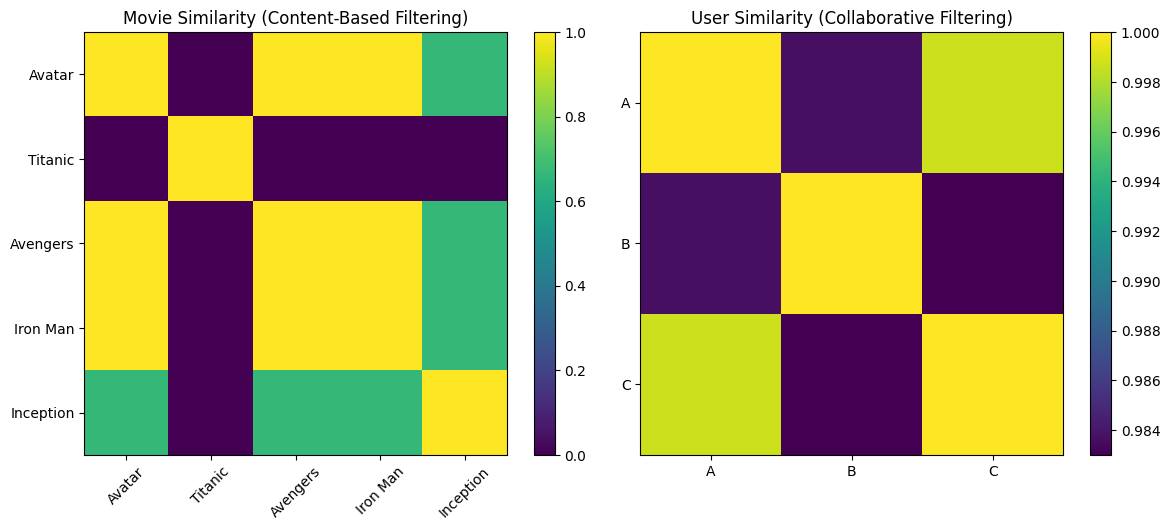

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# -------------------------------
# Content-Based Filtering
# -------------------------------

movies = pd.DataFrame({
    'movie_id': [1, 2, 3, 4, 5],
    'title': ['Avatar', 'Titanic', 'Avengers', 'Iron Man', 'Inception'],
    'genre': ['Action Sci-Fi', 'Romance Drama', 'Action Sci-Fi', 'Action Sci-Fi', 'Sci-Fi Thriller']
})

print(movies)

# Vectorize genres
vectorizer = CountVectorizer()
genre_matrix = vectorizer.fit_transform(movies['genre'])

# Cosine similarity between movies
movie_similarity = cosine_similarity(genre_matrix)

# Recommendation function
def recommend_movie(movie_title):
    index = movies[movies['title'] == movie_title].index[0]
    scores = list(enumerate(movie_similarity[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:4]

    print(f"\nMovies similar to {movie_title}:")
    for i in scores:
        print(movies.iloc[i[0]]['title'])

recommend_movie("Avatar")


# -------------------------------
# Collaborative Filtering
# -------------------------------

ratings = pd.DataFrame({
    'User': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Avatar': [5, np.nan, 4, np.nan, 5, np.nan],
    'Titanic': [np.nan, 4, np.nan, 5, np.nan, 4],
    'Avengers': [5, 4, 4, 5, np.nan, 5]
})

# Consolidate duplicate users
ratings = ratings.groupby('User').mean()
print("\nRatings Matrix:")
print(ratings)

# Cosine similarity between users
user_similarity = cosine_similarity(ratings.fillna(0))
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=ratings.index,
    columns=ratings.index
)

print("\nUser Similarity Matrix:")
print(user_similarity_df)

# Recommendation function
def recommend_user(user):
    similar_users = user_similarity_df[user].sort_values(ascending=False)[1:]
    print(f"\nUsers similar to {user}:")
    print(similar_users)

recommend_user('A')


# -------------------------------
# MERGED GRAPH (ONE FIGURE)
# -------------------------------

plt.figure(figsize=(12, 5))

# Movie Similarity Heatmap
plt.subplot(1, 2, 1)
plt.imshow(movie_similarity)
plt.colorbar()
plt.xticks(range(len(movies)), movies['title'], rotation=45)
plt.yticks(range(len(movies)), movies['title'])
plt.title("Movie Similarity (Content-Based Filtering)")

# User Similarity Heatmap
plt.subplot(1, 2, 2)
plt.imshow(user_similarity)
plt.colorbar()
plt.xticks(range(len(ratings.index)), ratings.index)
plt.yticks(range(len(ratings.index)), ratings.index)
plt.title("User Similarity (Collaborative Filtering)")

plt.tight_layout()
plt.show()
